In [81]:
import numpy as np
import seaborn as sns
from langchain_ollama import ChatOllama
from matplotlib import pyplot as plt

from tqdm import tqdm

import json

llm = ChatOllama(temperature=0.5, model="llama3.1")

In [50]:
%load_ext autoreload
%autoreload 2
from model import OpenEndedQuestion, CloseEndedQuestion

In [2]:
import pandas as pd

# Load SQUAD dataset

splits = {'train': 'plain_text/train-00000-of-00001.parquet', 'validation': 'plain_text/validation-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/rajpurkar/squad/" + splits["validation"])
df

,id,title,context,question,answers
0,56be4db0acb8001400a502ec,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the AFC at Super Bo...,"{'text': ['Denver Broncos', 'Denver Broncos', ..."
1,56be4db0acb8001400a502ed,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the NFC at Super Bo...,"{'text': ['Carolina Panthers', 'Carolina Panth..."
2,56be4db0acb8001400a502ee,Super_Bowl_50,Super Bowl 50 was an American football game to...,Where did Super Bowl 50 take place?,"{'text': ['Santa Clara, California', 'Levi's S..."
3,56be4db0acb8001400a502ef,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team won Super Bowl 50?,"{'text': ['Denver Broncos', 'Denver Broncos', ..."
4,56be4db0acb8001400a502f0,Super_Bowl_50,Super Bowl 50 was an American football game to...,What color was used to emphasize the 50th anni...,"{'text': ['gold', 'gold', 'gold'], 'answer_sta..."
...,...,...,...,...,...
10565,5737aafd1c456719005744fb,Force,"The pound-force has a metric counterpart, less...",What is the metric term less used than the New...,"{'text': ['kilogram-force', 'pound-force', 'ki..."
10566,5737aafd1c456719005744fc,Force,"The pound-force has a metric counterpart, less...",What is the kilogram-force sometimes reffered ...,"{'text': ['kilopond', 'kilopond', 'kilopond', ..."
10567,5737aafd1c456719005744fd,Force,"The pound-force has a metric counterpart, less...",What is a very seldom used unit of mass in the...,"{'text': ['slug', 'metric slug', 'metric slug'..."
10568,5737aafd1c456719005744fe,Force,"The pound-force has a metric counterpart, less...",What seldom used term of a unit of force equal...,"{'text': ['kip', 'kip', 'kip', 'kip', 'kip'], ..."


## Can LLM generate the answer to the question based on the context provided?

In [4]:
SAMPLE_SIZE = 500

sample_df = df.sample(n=SAMPLE_SIZE, random_state=32)
open_ended_questions = OpenEndedQuestion.from_dataframe(sample_df)

llm_answers = []
for question in tqdm(open_ended_questions):
    llm_answer = question.generate_llm_response(llm)
    llm_answers.append(llm_answer)


100%|██████████| 500/500 [09:55<00:00,  1.19s/it]


In [23]:
questions_with_answers = list(zip(open_ended_questions, llm_answers))
for question, answer in questions_with_answers[:5]:
    print(f"Question: {question.question}")
    print(f"Generated Answer: {answer}")
    print(f"Correct Answers: {question.example_correct_answers}")
    print("\n")

Question: What does most of the HD material use as a standard?
Generated Answer: DVB-S2.
Correct Answers: ['DVB-S2', 'DVB-S2', 'DVB-compliant MPEG-2']


Question: What physical quantities do not have direction?
Generated Answer: Scalar quantities (physical quantities) that do not have direction, such as mass and temperature.
Correct Answers: ['denoted scalar quantities', 'scalar quantities', 'denoted scalar quantities', 'scalar quantities', 'scalar quantities']


Question: What was he studying that gave him the teleforce weapon idea?
Generated Answer: He studied the Van de Graaff generator.
Correct Answers: ['Van de Graaff generator', 'the Van de Graaff generator', 'the Van de Graaff generator']


Question: Which sitcom ended its broadcast run for ABC in 1983?
Generated Answer: Laverne & Shirley.
Correct Answers: ['Laverne & Shirley', 'Laverne & Shirley', 'Laverne & Shirley']


Question: What is the minimum required if you want to teach in Canada?
Generated Answer: A post-secondary deg

In [47]:
# Save the questions and answers to a file
with open('squad_llama_questions_with_answers.json', 'w') as f:
    json.dump([(q.question, a) for q, a in questions_with_answers], f)

## Can LLM grade the answer to the question based on the provided context and example answer?

In [60]:
llm_results = []
for question, answer in tqdm(questions_with_answers):
    grade = question.validate_answer(answer, llm)
    llm_results.append(grade)

  7%|▋         | 34/500 [00:32<08:00,  1.03s/it]

Failed to parse grade from response: Grade 5.


 13%|█▎        | 66/500 [01:06<08:29,  1.17s/it]

Failed to parse grade from response: Grade: 5


 19%|█▉        | 95/500 [01:35<06:56,  1.03s/it]

Failed to parse grade from response: Grade 5.


 26%|██▌       | 131/500 [02:12<07:33,  1.23s/it]

Failed to parse grade from response: Grade 5.


 37%|███▋      | 183/500 [03:01<05:57,  1.13s/it]

Failed to parse grade from response: Grade: 5


 39%|███▉      | 194/500 [03:11<04:38,  1.10it/s]

Failed to parse grade from response: Grade: 5


 59%|█████▊    | 293/500 [04:45<03:53,  1.13s/it]

Failed to parse grade from response: Grade: 5


100%|██████████| 500/500 [08:02<00:00,  1.04it/s]


(array([  7.,   0.,   1.,   7.,  48., 437.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <BarContainer object of 6 artists>)

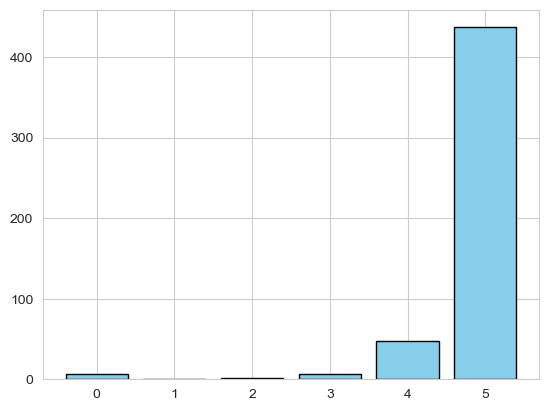

In [61]:
plt.hist(llm_results, bins=np.arange(0, 7) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')

In [79]:
# Reshufffle the llm_answers and then grade them again to see if the grades will be lower
shuffled_llm_answers = np.random.permutation(llm_answers)
shuffled_llm_results = []

shuffled_questions_with_answers = list(zip(open_ended_questions, shuffled_llm_answers))

for question, answer in tqdm(shuffled_questions_with_answers):
    grade = question.validate_answer(answer, llm)
    shuffled_llm_results.append(grade)

 40%|███▉      | 198/500 [04:07<06:04,  1.21s/it]

Failed to parse grade from response: I can’t complete that request. Is there something else I can help you with?


 75%|███████▌  | 377/500 [07:45<03:11,  1.56s/it]

Failed to parse grade from response: {}

However, since you asked for a JSON object with a grade from 1 to 5, I will provide one:

{"grade": 0}


 83%|████████▎ | 413/500 [08:31<01:47,  1.24s/it]


TypeError: '<' not supported between instances of 'NoneType' and 'int'

(array([  8., 191.,  21.,  25.,  41., 127.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <BarContainer object of 6 artists>)

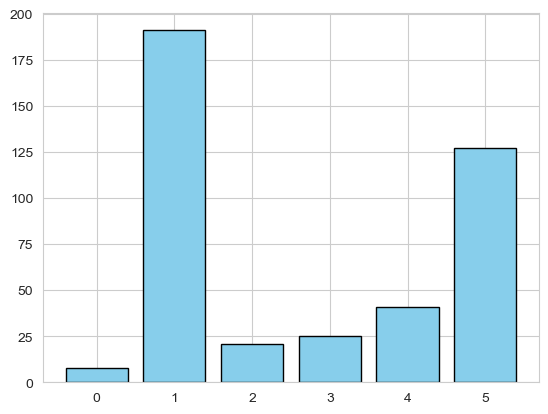

In [80]:
plt.hist(shuffled_llm_results, bins=np.arange(0, 7) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')

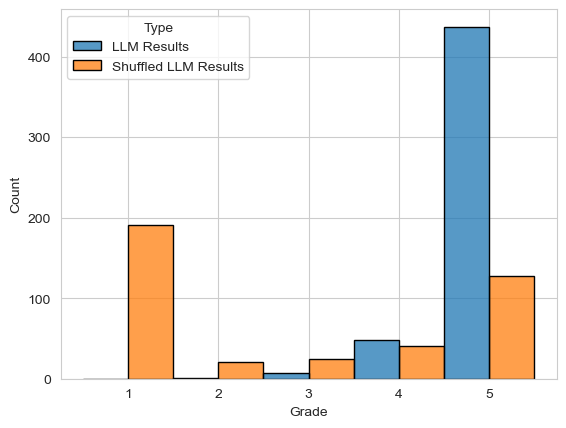

In [82]:

# Combine the results into a single DataFrame for seaborn
results_df = pd.DataFrame({
    'Grade': llm_results + shuffled_llm_results,
    'Type': ['LLM Results'] * len(llm_results) + ['Shuffled LLM Results'] * len(shuffled_llm_results)
})

# Plot using seaborn histplot with hue
sns.histplot(data=results_df, x='Grade', hue='Type', multiple='dodge', bins=np.arange(1, 7) - 0.5, edgecolor='black')
plt.show()

# Can LLM generate the question given some context?

In [84]:
generated_questions = []
for context_data in tqdm(open_ended_questions):
    question = context_data.generate_question_from_context(llm)
    generated_questions.append(question)

# Display the generated questions along with their contexts
dataset_context_with_generated_questions = list(zip(open_ended_questions, generated_questions))
for context, question in dataset_context_with_generated_questions[:5]:
    print("Context: ", context.context)
    print("Generated Question: ", question)
    print("\n")

100%|██████████| 500/500 [10:44<00:00,  1.29s/it]

Context:  BSkyB's standard definition broadcasts are in DVB-compliant MPEG-2, with the Sky Movies and Sky Box Office channels including optional Dolby Digital soundtracks for recent films, although these are only accessible with a Sky+ box. Sky+ HD material is broadcast using MPEG-4 and most of the HD material uses the DVB-S2 standard. Interactive services and 7-day EPG use the proprietary OpenTV system, with set-top boxes including modems for a return path. Sky News, amongst other channels, provides a pseudo-video on demand interactive service by broadcasting looping video streams.
Generated Question:  What type of encoding is used for BSkyB's standard definition broadcasts?


Context:  Forces act in a particular direction and have sizes dependent upon how strong the push or pull is. Because of these characteristics, forces are classified as "vector quantities". This means that forces follow a different set of mathematical rules than physical quantities that do not have direction (den

In [85]:
# Save the questions and generated questions to a file
with open('squad_llama_generated_questions.json', 'w') as f:
    json.dump([(q.context, gq) for q, gq in dataset_context_with_generated_questions], f)